In [19]:
import os, sys
import pandas as pd
from PIL import Image,ImageDraw
from dotenv import load_dotenv
rpath = os.path.abspath('/home/user/Documents/10/w12/Semantic Image and Text Alignment')

if rpath not in sys.path:
    sys.path.insert(0, rpath)
load_dotenv()
rpath

'/home/user/Documents/10/w12/Semantic Image and Text Alignment'

In [21]:
image_path = rpath + "/data/Assets/performance_data/endframe.jpg"  

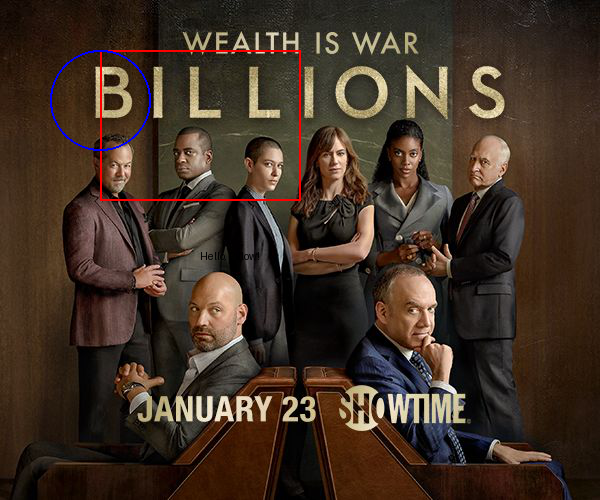

In [25]:
width, height = 400, 300
image =Image.open(image_path).convert("RGBA")

# Draw on the image
draw = ImageDraw.Draw(image)

# Draw a red rectangle
left_top = (100, 50)
right_bottom = (300, 200)
draw.rectangle([left_top, right_bottom], outline='red', width=2)

# Draw a blue ellipse
draw.ellipse([50, 50, 150, 150], outline='blue', width=2)

# Draw text
text_position = (200, 250)
text = "Hello, Pillow!"
draw.text(text_position, text, fill='black')

# Save the image
display(image)

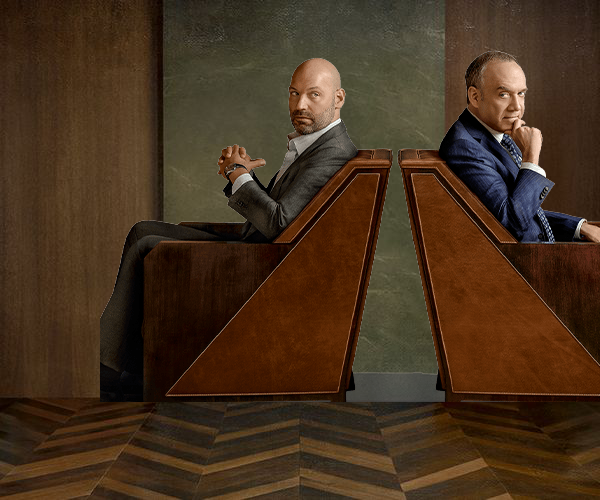

In [27]:
base_image_path = rpath + "/data/Assets/performance_data/landing_1.jpg"   
base_image = Image.open(base_image_path).convert('RGBA')

# Open the image to overlay (foreground)
overlay_image_path = rpath + "/data/Assets/performance_data/landing_2.png"
overlay_image = Image.open(overlay_image_path).convert('RGBA')

# Calculate the position to paste the overlay image (e.g., top-left corner)
position = (100, 50)  # Adjust as needed

# Paste the overlay image onto the base image
base_image.paste(overlay_image, position, overlay_image)

# Save or display the combined image
combined_image_path = 'combined_image.png'
base_image.save(combined_image_path)

# Display the combined image (optional for Jupyter Notebook)
from IPython.display import Image as IPImage, display
display(IPImage(combined_image_path))

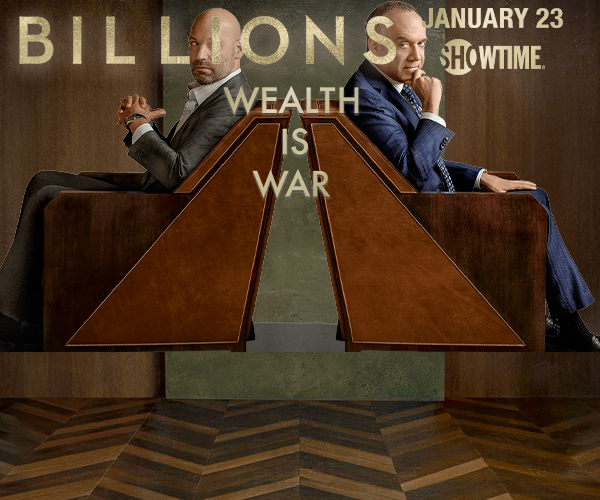

In [31]:
# Function to overlay multiple images onto a base image
def overlay_images(base_image_path, overlay_paths, output_path):
    # Open the base image
    base_image = Image.open(base_image_path).convert('RGBA')
    
    # Iterate over each overlay image path
    for overlay_path in overlay_paths:
        # Open the overlay image
        overlay_image = Image.open(overlay_path).convert('RGBA')
        
        # Paste the overlay image onto the base image
        base_image.paste(overlay_image, (0, 0), overlay_image)
    
    # Save the combined image
    base_image.save(output_path)
    
    # Display the combined image (optional for Jupyter Notebook)
    from IPython.display import Image as IPImage, display
    display(IPImage(output_path))



overlay_paths = [
     rpath + "/data/Assets/performance_data/landing_2.png",  
     rpath + "/data/Assets/performance_data/logo.png",
   # "/data/Assets/performance_data/landing_2.png",
]
output_path = 'combined_image.png'  # Output combined image path

# Call the function to overlay images
overlay_images(base_image_path, overlay_paths, output_path)


In [33]:
import cv2
import numpy as np

# Function to overlay multiple images onto a base image using OpenCV
def overlay_images_cv(base_image_path, overlay_paths, output_path):
    # Read the base image
    base_image = cv2.imread(base_image_path, cv2.IMREAD_UNCHANGED)
    
    # Iterate over each overlay image path
    for overlay_path in overlay_paths:
        # Read the overlay image
        overlay_image = cv2.imread(overlay_path, cv2.IMREAD_UNCHANGED)
        
        # Resize overlay image to match base image dimensions
        overlay_image = cv2.resize(overlay_image, (base_image.shape[1], base_image.shape[0]))
        
        # Extract the alpha channel from the overlay image
        alpha = overlay_image[:, :, 3] / 255.0
        
        # Blend the images
        blended_image = cv2.addWeighted(base_image, 1.0, overlay_image[:, :, :3], alpha, 0)
        
        # Update the base image with the blended result
        base_image = blended_image
    
    # Save the combined image
    cv2.imwrite(output_path, base_image)
    
    # Display the combined image (optional for Jupyter Notebook)
    from IPython.display import Image as IPImage, display
    display(IPImage(output_path))



overlay_paths = [
     rpath + "/data/Assets/performance_data/landing_2.png",  
     rpath + "/data/Assets/performance_data/logo.png",
   # "/data/Assets/performance_data/landing_2.png",
]
output_path = 'combined_image.png'  # Output combined image path

# Call the function to overlay images using OpenCV
overlay_images_cv(base_image_path, overlay_paths, output_path)


error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'addWeighted'
> Overload resolution failed:
>  - Argument 'beta' can not be treated as a double
>  - Argument 'beta' can not be treated as a double
